In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
sd=pd.read_csv("C:/download files/bank-marketing.csv")

In [3]:
print("Dataset with rows {} and columns {}".format(sd.shape[0],sd.shape[1]))
sd.head()

Dataset with rows 45211 and columns 19


,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
sd.shape

(45211, 19)

In [5]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [6]:
sd.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [7]:
sd.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

# Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [8]:
df=sd.copy()

In [9]:
df.drop(df[df['pdays'] < 0 ].index , inplace = True)

In [10]:
df.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

# Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

<AxesSubplot:ylabel='education'>

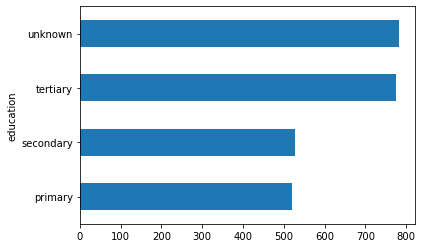

In [11]:
df.groupby(['education'])['balance'].median().plot.barh()

# Make a box plot for pdays. Do you see any outliers?

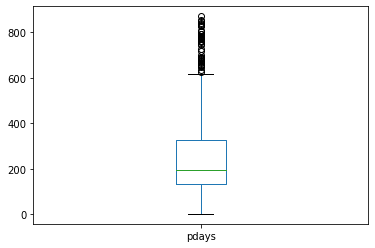

In [12]:
df.pdays.plot.box()
plt.show()

# The final goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target variable is “response”.


# First, perform bi-variate analysis to identify the features that are directly associated with the target  variable. You can refer to the notebook we used for the EDA discussion.

# ---> Converting the response variable to a convenient form

In [13]:
df.response.value_counts(normalize = True)

no     0.769287
yes    0.230713
Name: response, dtype: float64

In [14]:
df.replace({'response' : {'yes' : 1, 'no' : 0 }},inplace = True)

In [15]:
df.response.value_counts()

0    6352
1    1905
Name: response, dtype: int64

# ---> Make suitable plots for associations with numerical features and categorical features’

In [16]:
sd.shape

(45211, 19)

In [17]:
sd

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [18]:
# here we are seperating object and numerical data types

In [19]:
obj_col = []
num_col = []
for col in df.columns:
    if df[col].dtype=='O':
        obj_col.append(col)
    else:
        num_col.append(col)

In [20]:
print('object data type features' , obj_col)
print('numerical data type features' , num_col)

object data type features ['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical data type features ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']


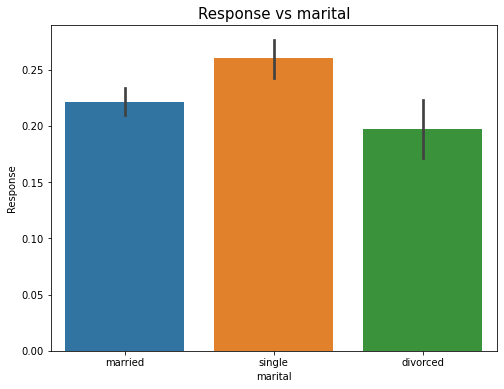

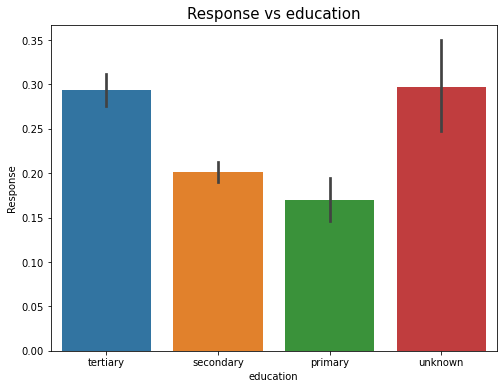

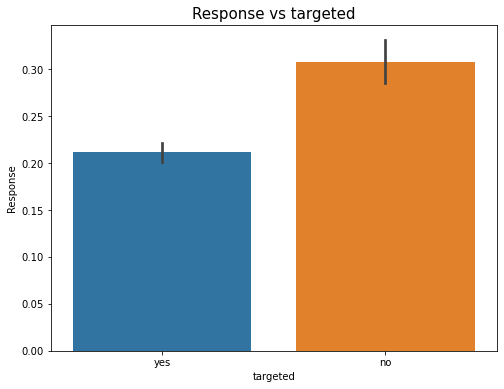

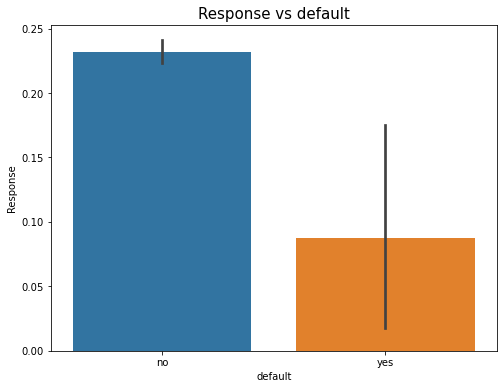

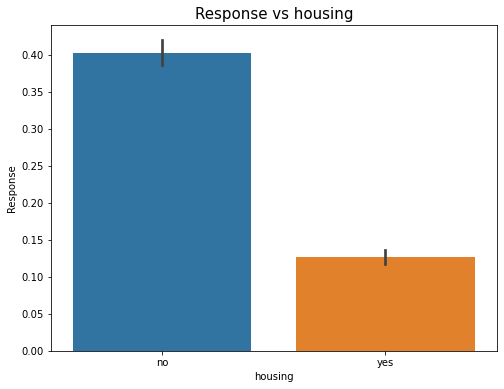

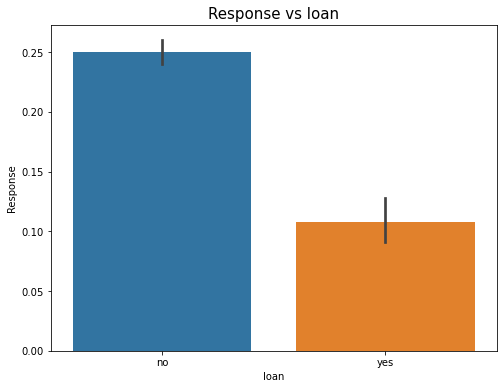

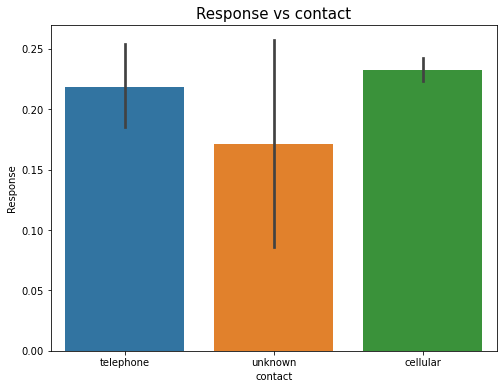

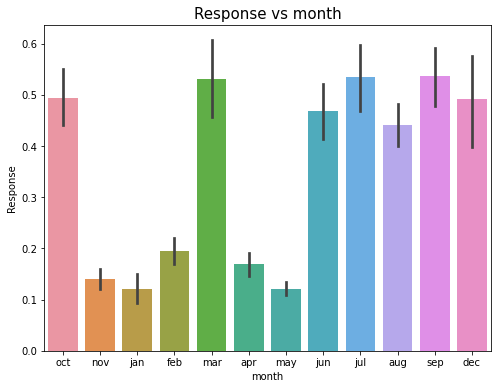

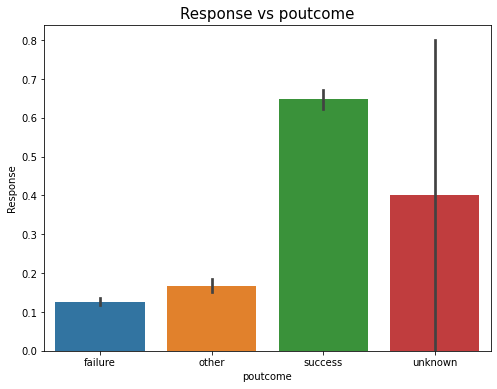

In [21]:
from numpy import median
for col in obj_col[1:]:
    plt.figure(figsize=(8,6))
    sns.barplot(df[col],df["response"])
    plt.title("Response vs "+col,fontsize=15)
    plt.xlabel(col,fontsize=10)
    plt.ylabel("Response",fontsize=10)
    plt.show()
    
    

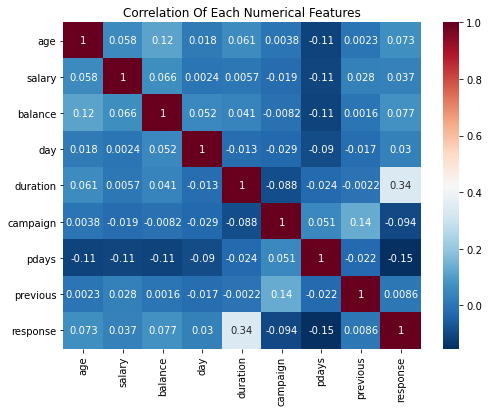

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap='RdBu_r')
plt.title("Correlation Of Each Numerical Features")
plt.show()

___>we can see that duration variable is highly correlated with response variable 'Response Flag' . Whereas pdays variable is not highly correlated with response variable 'Response Flag'.

__>numeric variable

<Figure size 720x576 with 0 Axes>

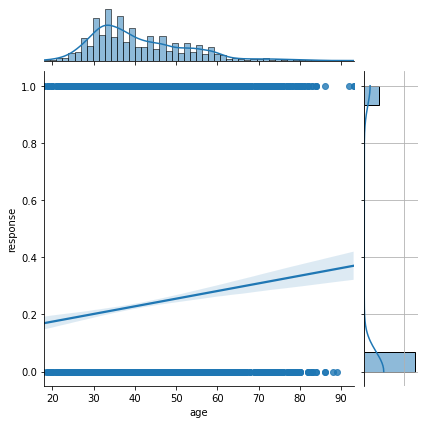

<Figure size 720x576 with 0 Axes>

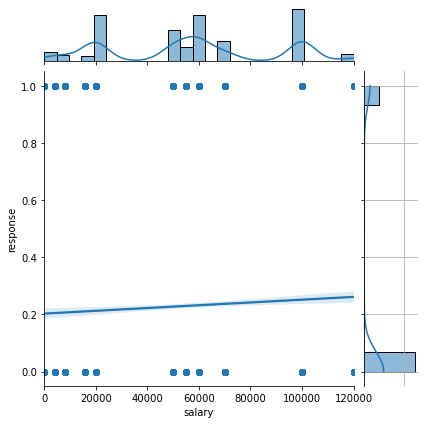

<Figure size 720x576 with 0 Axes>

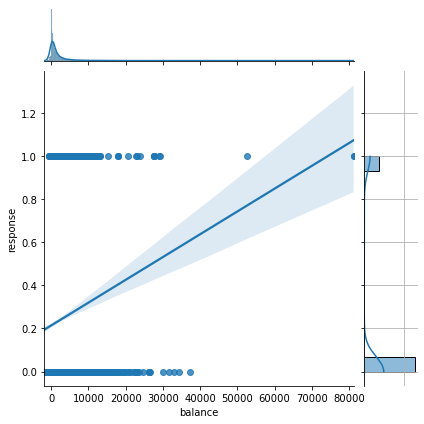

<Figure size 720x576 with 0 Axes>

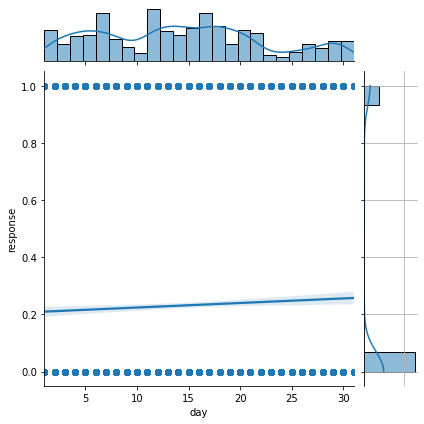

<Figure size 720x576 with 0 Axes>

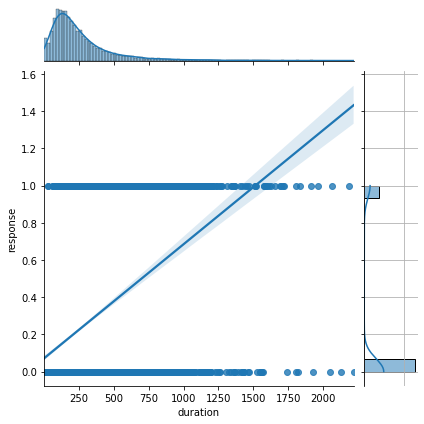

<Figure size 720x576 with 0 Axes>

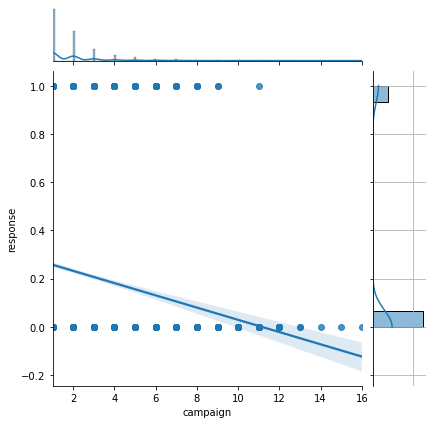

<Figure size 720x576 with 0 Axes>

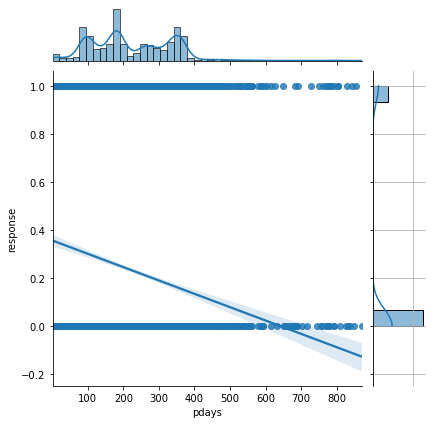

<Figure size 720x576 with 0 Axes>

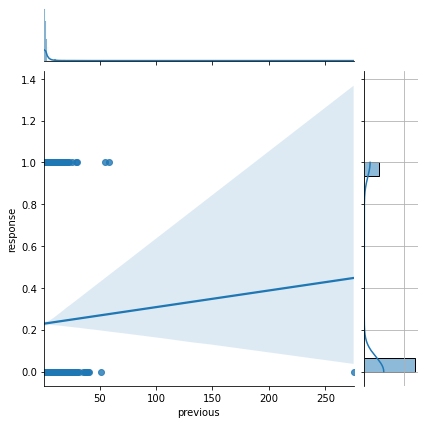

In [23]:
for col in num_col[:-1]:
    plt.figure(figsize=(10,8))
    sns.jointplot(x = df[col],y = df["response"],kind='reg')
    plt.xlabel(col,fontsize = 15)
    plt.ylabel("Response",fontsize = 15)
    plt.grid()
    plt.show()

# Handle variables corresponding to the previous campaign label Enconding

In [25]:

from sklearn.preprocessing import LabelEncoder

In [35]:

df2 = df[obj_col].apply(LabelEncoder().fit_transform)

In [36]:
df2.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome
24060,0,1,2,1,0,0,0,1,10,0
24062,0,2,1,1,0,1,1,1,10,1
24064,7,1,1,1,0,1,0,1,10,0
24072,4,1,2,1,0,1,0,1,10,1
24077,4,1,2,1,0,1,0,1,10,0


In [38]:
df3 = df2.join(sd[num_col])

In [40]:
df3.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151,3,no
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1,yes
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4,yes
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4,no
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143,3,yes


In [41]:
df3.corr()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
job,1.000000,0.072746,0.159280,-0.091197,-0.021012,-0.132378,-0.033500,-0.006279,-0.002498,0.066642,-0.020606,0.115271,0.041975,0.013841,0.024449,-0.008764,-0.110505,-0.000266
marital,0.072746,1.000000,0.121688,-0.255247,-0.005632,-0.056963,-0.055435,-0.031866,-0.024130,0.045015,-0.414972,-0.042212,-0.019767,0.016797,-0.009075,-0.008338,-0.011861,0.004536
education,0.159280,0.121688,1.000000,-0.632513,-0.013682,-0.129804,-0.047718,-0.048456,-0.010829,0.082852,-0.119516,0.423157,0.074166,0.023542,-0.001142,-0.024343,-0.140155,0.000115
targeted,-0.091197,-0.255247,-0.632513,1.000000,0.019593,0.087470,0.070420,0.020464,0.010187,-0.071356,0.140750,-0.228338,-0.052007,-0.026179,-0.014729,0.017948,0.075638,-0.001205
default,-0.021012,-0.005632,-0.013682,0.019593,1.000000,0.022644,0.052261,-0.019834,0.020123,-0.025566,-0.027825,0.000361,-0.045010,-0.001013,-0.002635,-0.002064,0.033760,0.012149
housing,-0.132378,-0.056963,-0.129804,0.087470,0.022644,1.000000,0.109815,-0.069869,0.014452,-0.284439,-0.179386,-0.035905,-0.109163,-0.066740,-0.072070,0.063071,0.335124,0.008934
loan,-0.033500,-0.055435,-0.047718,0.070420,0.052261,0.109815,1.000000,-0.020904,0.000524,-0.103154,-0.008330,0.013788,-0.085004,0.007550,-0.033874,0.007444,0.022454,0.016549
contact,-0.006279,-0.031866,-0.048456,0.020464,-0.019834,-0.069869,-0.020904,1.000000,0.047045,0.024590,0.166384,-0.035805,0.030317,-0.012330,-0.036360,0.063199,0.077235,0.043830
month,-0.002498,-0.024130,-0.010829,0.010187,0.020123,0.014452,0.000524,0.047045,1.000000,-0.019188,0.013909,0.019820,0.015723,-0.024264,-0.036446,0.023224,0.022529,0.013977
poutcome,0.066642,0.045015,0.082852,-0.071356,-0.025566,-0.284439,-0.103154,0.024590,-0.019188,1.000000,0.051987,0.013079,0.051464,0.017125,0.108473,-0.000502,-0.235119,0.041607


#  Predictive model 1: Logistic regression

In [74]:
X = df3.drop("response", axis=1)
X.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
24060,0,1,2,1,0,0,0,1,10,0,33,50000,882,21,39,1,151,3
24062,0,2,1,1,0,1,1,1,10,1,42,50000,-247,21,519,1,166,1
24064,7,1,1,1,0,1,0,1,10,0,33,70000,3444,21,144,1,91,4
24072,4,1,2,1,0,1,0,1,10,1,36,100000,2415,22,73,1,86,4
24077,4,1,2,1,0,1,0,1,10,0,36,100000,0,23,140,1,143,3


In [75]:
y= df3[['response']]
y.head()

,response
24060,no
24062,yes
24064,yes
24072,no
24077,yes


In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [78]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [79]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score
np.random.seed(42)

In [80]:
from sklearn.model_selection import cross_val_score

In [81]:

lr.fit(X_train,y_train)

LogisticRegression()

In [82]:
cv_score= cross_val_score(lr,X_train,y_train, cv=5)
np.mean(cv_score)

0.7780469341408025

In [83]:
y_pred = lr.predict(X_test)

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.81      0.95      0.87      1279
         yes       0.57      0.21      0.31       373

    accuracy                           0.79      1652
   macro avg       0.69      0.58      0.59      1652
weighted avg       0.75      0.79      0.75      1652



In [85]:
confusion_matrix(y_pred,y_test)

array([[1219,  294],
       [  60,   79]], dtype=int64)

# Use RFE to select top n features in an automated fashion (choose n as you see fit)


In [87]:
from sklearn.feature_selection import RFE

In [92]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [94]:
rfe = RFE(lr, 5)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [95]:

rfe.support_

array([False, False, False, False,  True,  True,  True,  True, False,
        True, False, False, False, False, False, False, False, False])

In [97]:
X_train.columns[rfe.support_]

Index(['default', 'housing', 'loan', 'contact', 'poutcome'], dtype='object')

In [98]:

cols = X_train.columns[rfe.support_]

In [99]:
lr.fit(X_train[cols],y_train)

LogisticRegression()

In [100]:
y_pred2 = lr.predict(X_test[cols])

In [102]:

confusion_matrix(y_pred2,y_test)

array([[1222,  228],
       [  57,  145]], dtype=int64)

# Estimate the model performance using k fold cross validation

In [103]:
import statsmodels.api as sm

In [104]:
X_train.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
40829,0,2,1,1,0,1,0,0,1,2,40,50000,100,11,221,1,461,1
29715,9,1,1,1,0,0,1,0,3,0,45,60000,366,3,235,2,169,12
35015,9,1,1,1,0,1,0,0,8,0,32,60000,-360,6,131,2,344,2
41008,0,2,2,0,0,0,0,0,1,2,36,50000,994,13,185,2,105,3
40646,8,2,1,1,0,1,0,1,1,0,25,4000,41,5,100,2,93,2


In [105]:
X_train_sm = sm.add_constant(X_train[cols])
X_train_sm.head()

,const,default,housing,loan,contact,poutcome
40829,1.0,0,1,0,0,2
29715,1.0,0,0,1,0,0
35015,1.0,0,1,0,0,0
41008,1.0,0,0,0,0,2
40646,1.0,0,1,0,1,0


#  Using p values and VIF, get rid of the redundant features

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [110]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,age,11.79
2,education,6.43
3,targeted,6.43
11,salary,5.38
16,pdays,5.21
1,marital,4.35
13,day,4.10
8,month,3.60
5,housing,3.14
15,campaign,2.87


# Predictive model 2: Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
rfc = RandomForestClassifier(max_depth=5, random_state=42,max_leaf_nodes=50)

In [113]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, random_state=42)

In [114]:
cv1_score= cross_val_score(rfc,X_train,y_train, cv=5)
np.mean(cv1_score)

0.8392127176381529

In [115]:
y_pred1 = rfc.predict(X_test)


In [116]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

          no       0.86      0.97      0.91      1279
         yes       0.80      0.45      0.57       373

    accuracy                           0.85      1652
   macro avg       0.83      0.71      0.74      1652
weighted avg       0.84      0.85      0.83      1652



In [118]:
confusion_matrix(y_test,y_pred1)

array([[1236,   43],
       [ 206,  167]], dtype=int64)

# Make a predictive model using random forest technique

In [120]:
from sklearn.feature_selection import RFE

In [121]:
rfe1 = RFE(rfc, 5)
rfe1.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(max_depth=5, max_leaf_nodes=50,
                                     random_state=42),
    n_features_to_select=5)

In [122]:
rfe1.support_

array([False, False, False, False, False,  True, False, False,  True,
        True, False, False, False, False,  True, False,  True, False])

In [123]:

X_train.columns[rfe1.support_]

Index(['housing', 'month', 'poutcome', 'duration', 'pdays'], dtype='object')

In [124]:
cols = X_train.columns[rfe1.support_]

In [125]:
rfc.fit(X_train[cols],y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, random_state=42)

In [126]:

y_pred3 = rfc.predict(X_test[cols])

In [128]:
confusion_matrix(y_pred3,y_test)

array([[1219,  173],
       [  60,  200]], dtype=int64)